In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21064\3115042693.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

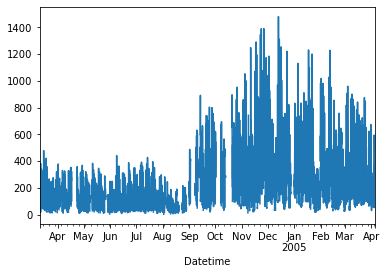

In [2]:
df["NOx(GT)"].plot()

In [3]:
nox = df["NOx(GT)"].interpolate().copy()

In [5]:
"""
IQR-based Outlier Detection
"""
# Q1, Q2(median), Q3
q1 = nox.quantile(0.25) 
median = nox.quantile(0.5) 
q3 = nox.quantile(0.75)

In [6]:
# 사분위수 범위, 상한, 하한
iqr = q3 - q1
upper_fence = q3 + 1.5 * iqr
lower_fence = q1 - 1.5 * iqr
print(upper_fence, lower_fence)

671.0 -249.0


In [7]:
# iqr 기반 이상치 탐지
outliers = nox.loc[(upper_fence < nox) | (nox < lower_fence)]
outliers

Datetime
2004-09-13 20:00:00    728.0
2004-09-13 21:00:00    891.0
2004-09-20 09:00:00    737.0
2004-09-20 19:00:00    681.0
2004-09-21 07:00:00    699.0
                       ...  
2005-03-23 20:00:00    874.0
2005-03-24 12:00:00    690.0
2005-03-24 20:00:00    847.0
2005-03-24 21:00:00    691.0
2005-03-31 07:00:00    673.0
Name: NOx(GT), Length: 432, dtype: float64

C:\Users\skydo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOx(GT)', ylabel='Density'>

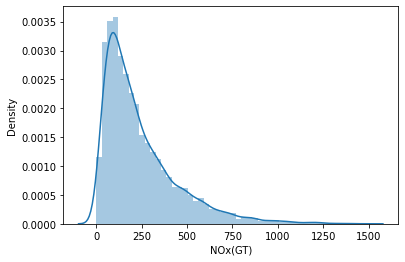

In [8]:
"""
Detecting Outliers with Z-Scores
"""

# Visualize the distribution of the 'CO(GT)' variable
import seaborn as sns

sns.distplot(nox)

In [9]:
# 평균 표준 구하기
mean = np.mean(nox)
std = np.std(nox)
print(mean, std)

241.92219728545473 204.30415704207252


In [12]:
# Z-Score 기반 이상치 탐지
outliers = []
thres = 3

for i in nox:
    z_score = (i - mean) / std
    if (np.abs(z_score) > thres):
        outliers.append(i)
print(outliers)

[891.0, 895.0, 860.0, 918.0, 952.0, 859.0, 1052.0, 1014.0, 1001.0, 1247.0, 1110.0, 1145.0, 892.0, 1071.0, 878.0, 905.0, 858.0, 1290.0, 1148.0, 992.0, 1132.0, 1195.0, 1120.0, 870.0, 881.0, 870.0, 884.0, 896.0, 953.0, 980.0, 1058.0, 1080.0, 1301.0, 1345.0, 1218.0, 884.0, 920.0, 980.0, 1188.0, 1045.0, 999.0, 955.0, 1189.0, 933.0, 898.0, 1201.0, 1369.0, 1389.0, 1358.0, 1189.0, 866.0, 865.0, 936.0, 1074.0, 911.0, 864.0, 960.0, 1056.0, 856.0, 949.0, 932.0, 1071.0, 1134.0, 1389.0, 866.0, 947.0, 1155.0, 948.0, 1044.0, 1172.0, 1000.0, 861.0, 933.0, 987.0, 985.0, 1040.0, 860.0, 1001.0, 1184.0, 1020.0, 964.0, 928.0, 897.0, 858.0, 968.0, 920.0, 1014.0, 1479.0, 1018.0, 920.0, 1159.0, 1310.0, 1037.0, 861.0, 933.0, 1237.0, 1137.0, 905.0, 1015.0, 1018.0, 1058.0, 1182.0, 1089.0, 1186.0, 1235.0, 1253.0, 1237.0, 1060.0, 873.0, 1005.0, 937.0, 963.0, 864.0, 1089.0, 1070.0, 1220.0, 1076.0, 992.0, 1130.0, 977.0, 910.0, 1216.0, 1230.0, 1049.0, 999.0, 1022.0, 1023.0, 1065.0, 1098.0, 1099.0, 939.0, 875.0, 875.0